# Legendary Pokemon Classifier

## by Piero Trujillo and Randy Ross

# Abstract

The focus of our project was to find a reliable way to classify legendary pokemon based on their different attributes. Many attributes of a pokemon were taken into account. These included their capture rate as well as their attack, defense, and speed stats. With our findings we could compare our results with ordinary pokemon, whose stats neighbored those of a legendary pokemon, in order to strong pokemon that would ordinarily be overlooked. Our data showed that the best classifiers for a legendary pokemon were their capture rate and defense stat. Therefore, legendary pokemon must have low capture rates and high defense stats. With this in mind, we were able to classify legendary pokemon with a success rate of 95.9%.

# Introduction

Our primary goal was to build a classifier to identify legendary pokemon. We wondered which statistic would be the best indicator of a legendary pokemon. By comparing the stats of both regular and legendary pokemon, we would be able to find hidden gems in the game and be closer to building a Pokemon dream team: a team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon. 

Our motivation is that Pokemon is awesome, simple as that. As the leading franchise of all time, Pokemon holds a special place in the hearts of a lot of people. Every new generation brings a lot of fresh faces into the world of Pokemon and the pandemic has definitely given us the time and lingering nostalgia to rope us back in as we try to relive those fun times. Whether you’re an experienced trainer looking to optimize your playthrough or a newcomer ready to learn the basics, the conclusions from this data set will guide you through your Pokemon journey. 

For readers unaware, Pokemon is a role playing game where you explore the world as a trainer who captures different pokemon, defeat gym leaders and eventually challenge elite trainers to become a pokemon master. Legendary pokemon can only be found once in the game, making them highly coveted and a rarity. They typically have very high stats, leading them to be very strong additions to your team. The main stats we are looking at  are capture rate, attack, defense, and speed. Capture rate is an important stat because it shows you the success rate of catching a pokemon. The higher the capture rate, the easier it is to catch a pokemon. Likewise, better Pokemon will have lower catch rates so you can’t easily get an overpowered pokemon. Therefore, legendary pokemon should correlate to a lower capture rate since they are the epitome of a powerful Pokemon. The attack and defense values show a pokemon’s base stats in these fields. Attack and defense correlate with their damage and resistance to physical move types like Rock or Normal types. In addition, Pokemon also have Special Attack and Special Defense stats to show their damage and resistance to special moves, usually with types like Fire or Psychic. Speed is an especially important stat because the fastest pokemon always attacks first and a higher speed stat makes it easier to land critical hits. The dataset we are using is [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon) by Rounak Banik, which contains information about 802 Pokemon from the first seven generations. The data set includes the names of the Pokemon, their primary and secondary types, attack and defense, and whether it is a legendary or not, in addition to other stats.

# Data and EDA

In [1]:
import numpy as np
from datascience import *
import random 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
np.random.seed(3)
random.seed(3)

In [2]:
pokemon = Table.read_table("pokemon.csv")
pokemon

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
"['Shield Dust', 'Run Away']",1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


## The Complete Pokemon Dataset - Rounak Banik

https://www.kaggle.com/rounakbanik/pokemon

**Ethical Considerations**

- Rounak Banik collected this data from http://serebii.net/, a very reputable Pokemon fan-site, because Pokemon is very special to him and built the dataset out of passion and curiosity for the game.
- We believe the analysis of this dataset does not cause harm to anyone because those represented in the data only exist virtually.
- Digital beings known as Pokemon are represented in the dataset. Nothing is being over-represented because the data is focusing solely on Pokemon and not any other groups.
- This could be considered ethically wrong if you are new to the game and want to experience it naturally.

**Relevant Attributes**
- The only data missing from the dataset is Pokemon generation 8 (released in 2019), which would bring it up to date.
- We are attempting to classify whether or not a certain Pokemon is legendary or not.
    + The variable will be either 0 or 1, where 0 means not legendary, and 1 means legendary.
- We will use attributes attack and sp_attack, defense and sp_defense (sp = special), capture rate, hp (hit points), and speed.
- We removed one Pokemon whose capture rate was "30 (Meteorite)255 (Core)", which is not a plain number.

## EDA

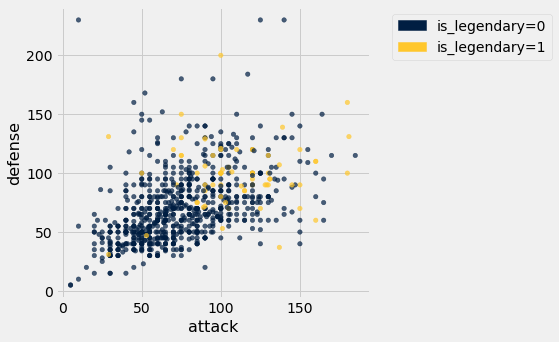

In [3]:
pokemon.scatter("attack", "defense", group="is_legendary")

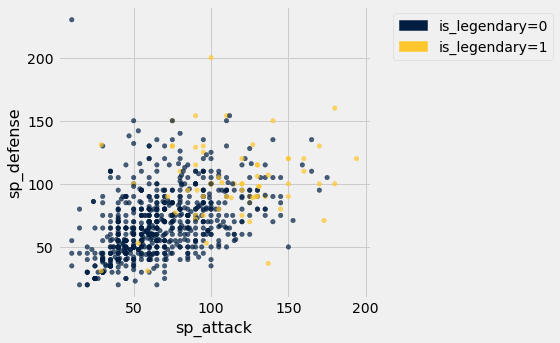

In [4]:
pokemon.scatter("sp_attack", "sp_defense", group="is_legendary")

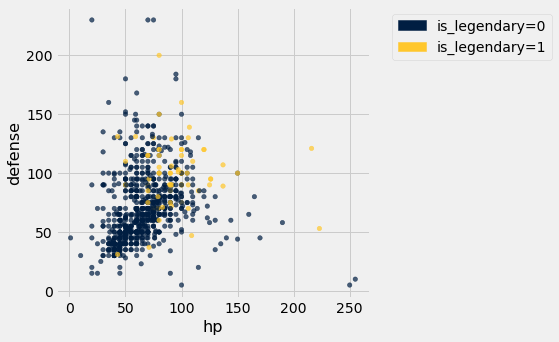

In [5]:
pokemon.scatter("hp", "defense", group="is_legendary")

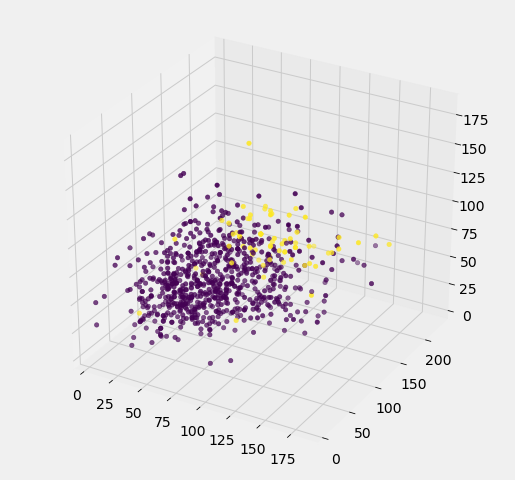

In [6]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(pokemon.column("attack"),
           pokemon.column("defense"),
           pokemon.column("speed"),
           c=pokemon.column("is_legendary"));

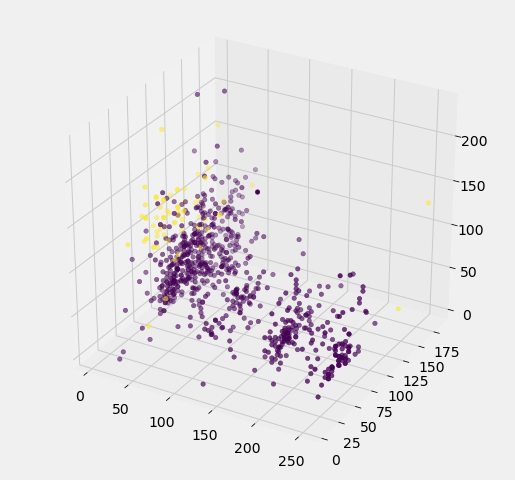

In [7]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(pokemon.column("capture_rate"), 
           pokemon.column("attack"), 
           pokemon.column("defense"), 
           c=pokemon.column("is_legendary"));

In [8]:
best_columns = pokemon.select("name", "attack", "defense", "capture_rate", "is_legendary")

legendaries = best_columns.where("is_legendary", are.equal_to(1))

capture_rate = legendaries.group("capture_rate")
attack = legendaries.group("attack")
defense = legendaries.group("defense")

capture_rate.show()
# attack.show()
# defense.show()

capture_rate,count
3,53
15,1
25,2
30,1
45,11
255,2


The above table shows that 53 of the 70 legendary Pokemon have the lowest capture rate in the game.

In [9]:
lowest_capture_rate = best_columns.sort("capture_rate")
lowest_capture_rate.take(range(20)).show()

name,attack,defense,capture_rate,is_legendary
Articuno,85,100,3,1
Zapdos,90,85,3,1
Moltres,100,90,3,1
Mewtwo,150,70,3,1
Raikou,85,75,3,1
Entei,115,85,3,1
Suicune,75,115,3,1
Lugia,90,130,3,1
Ho-Oh,130,90,3,1
Beldum,55,80,3,0


The above table shows that only 3 of the 20 lowest capture rates are non-legendary.

In [10]:
highest_defense = best_columns.sort("defense", descending=True)

highest_defense_20 = highest_defense.take(range(20))
highest_defense_20.show()
highest_defense_20.group("is_legendary")

name,attack,defense,capture_rate,is_legendary
Steelix,125,230,25,0
Shuckle,10,230,190,0
Aggron,140,230,45,0
Regirock,100,200,3,1
Avalugg,117,184,55,0
Slowbro,75,180,75,0
Cloyster,95,180,60,0
Bastiodon,52,168,45,0
Onix,45,160,45,0
Groudon,180,160,3,1


is_legendary,count
0,17
1,3


In [11]:
highest_attack = best_columns.sort("attack", descending=True)

highest_attack_20 = highest_attack.take(range(20))
highest_attack_100 = highest_attack.take(range(100))
highest_attack_200 = highest_attack.take(range(200))

# Number of legendaries in top defense pokemon
highest_attack_20_sum = highest_attack_20.stats().where("statistic", are.equal_to("sum"))[5][0]
highest_attack_100_sum = highest_attack_100.stats().where("statistic", are.equal_to("sum"))[5][0]
highest_attack_200_sum = highest_attack_200.stats().where("statistic", are.equal_to("sum"))[5][0]

print("% legendary in top 20:", (highest_attack_20_sum / 20) * 100)
print("% legendary in top 100:", (highest_attack_100_sum / 100) * 100)
print("% legendary in top 200:", (highest_attack_200_sum / 200) * 100)

% legendary in top 20: 35.0
% legendary in top 100: 28.000000000000004
% legendary in top 200: 23.0


This may be implying that when sorted by attack, more legendaries are concentrated at the top.

In [12]:
highest_defense_20 = highest_defense.take(range(20))
highest_defense_100 = highest_defense.take(range(100))
highest_defense_200 = highest_defense.take(range(200))

# Number of legendaries in top defense pokemon
highest_defense_20_sum = highest_defense_20.stats().where("statistic", are.equal_to("sum"))[5][0]
highest_defense_100_sum = highest_defense_100.stats().where("statistic", are.equal_to("sum"))[5][0]
highest_defense_200_sum = highest_defense_200.stats().where("statistic", are.equal_to("sum"))[5][0]

print("% legendary in top 20:", (highest_defense_20_sum / 20) * 100)
print("% legendary in top 100:", (highest_defense_100_sum / 100) * 100)
print("% legendary in top 200:", (highest_defense_200_sum / 200) * 100)

% legendary in top 20: 15.0
% legendary in top 100: 22.0
% legendary in top 200: 23.5


Unlike attack, when sorted by defense, there is not a higher concentration of legendaries at the top.

In [13]:
lowest_defense = best_columns.sort("defense")

lowest_defense_20 = lowest_defense.take(range(20))
lowest_defense_20.show()
lowest_defense_20.group("is_legendary")

name,attack,defense,capture_rate,is_legendary
Chansey,5,5,30,0
Happiny,5,5,130,0
Blissey,10,10,30,0
Abra,20,15,200,0
Pichu,40,15,190,0
Igglybuff,30,15,170,0
Smoochum,30,15,45,0
Jigglypuff,45,20,170,0
Carvanha,90,20,225,0
Feebas,15,20,255,0


is_legendary,count
0,20


In [14]:
lowest_attack = best_columns.sort("attack")

lowest_attack_20 = lowest_attack.take(range(20))
lowest_attack_20.show()
lowest_attack_20.group("is_legendary")

name,attack,defense,capture_rate,is_legendary
Chansey,5,5,30,0
Happiny,5,5,130,0
Magikarp,10,55,255,0
Shuckle,10,230,190,0
Blissey,10,10,30,0
Feebas,15,20,255,0
Metapod,20,55,120,0
Abra,20,15,200,0
Ledyba,20,30,255,0
Togepi,20,65,190,0


is_legendary,count
0,20


It seems that the capture rate of the Pokemon is the best indicator of whether it is legendary or not. The attack and defense of the Pokemon may also be a good indicator.

# Classification

## Training and testing sets

In [15]:
pokemon_classify_columns = pokemon.select("attack", "defense", "capture_rate", "is_legendary")

pokemon_classify_columns.stats()

statistic,attack,defense,capture_rate,is_legendary
min,5,5,3,0
max,185,230,255,1
median,75,70,60,0
sum,62264,58420,79009,70


In [16]:
all_legendaries = pokemon_classify_columns.where("is_legendary", are.equal_to(1)).sample(with_replacement=False)
non_legendaries = pokemon_classify_columns.where("is_legendary", are.equal_to(0)).sample(with_replacement=False)

num_legendary = all_legendaries.num_rows
num_non_legendary = non_legendaries.num_rows

num_legendary_training = int(0.667 * num_legendary)
num_non_legendary_training = int(0.667 * num_non_legendary)


# Take first two thirds legendary and non-legendary pokemon
training_legendary = all_legendaries.take(np.arange(num_legendary_training))
training_non_legendary = non_legendaries.take(np.arange(num_non_legendary_training))


# Take last third legendary and non-legendary
testing_legendary = all_legendaries.take(np.arange(num_legendary_training, num_legendary))
testing_non_legendary = non_legendaries.take(np.arange(num_non_legendary_training, num_non_legendary))


# Append training and testing legendary and non-legendary
testing_legendary.append(testing_non_legendary)
training_legendary.append(training_non_legendary)


# Shuffle training and testing and assign new names
training = training_legendary.shuffle()
testing = testing_legendary.shuffle()

training.relabel("is_legendary", "Class")
testing.relabel("is_legendary", "Class")

attack,defense,capture_rate,Class
92,108,100,0
50,120,75,0
135,105,75,0
15,20,255,0
95,95,45,0
105,90,45,0
115,60,60,0
74,74,45,0
120,75,45,0
47,75,150,0


We are putting two thirds of all the Pokemon into the training set, and the other third into the testing set. To make sure both sets have legendary Pokemon, first the legendary pokemon are separated from the non-legendary, and two thirds from each catagory are put into the training set, and the rest into the testing set.

### Classifier

In [17]:
def accuracy(predictions, labels):
    diff = labels - predictions
    num_incorrect = np.count_nonzero(diff)
    num_correct = len(labels) - num_incorrect
    accuracy = num_correct / len(labels)
    return accuracy

In [18]:
def distance_nn(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance_nn(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

def classify_table(training, points, k):
    """Classify a table of unlabled points using KNN"""
    def classify_p(p):
        return classify(training, p, k)

    classes = points.apply(classify_p)
    return points.with_column('Class', classes)

##  Classifying Legendary Pokemon

In [ ]:
prediction_1 = classify_table(training, testing.drop("Class"), 1)
prediction_3 = classify_table(training, testing.drop("Class"), 3)
prediction_5 = classify_table(training, testing.drop("Class"), 5)

In [ ]:
accuracy_1 = accuracy(prediction_1.column("Class"), testing.column("Class"))
accuracy_3 = accuracy(prediction_3.column("Class"), testing.column("Class"))
accuracy_5 = accuracy(prediction_5.column("Class"), testing.column("Class"))

print("k=1 ->", accuracy_1)
print("k=3 ->", accuracy_3)
print("k=5 ->", accuracy_5)

### Results

The classifier was run using a few different k-values for the k-nearest neighbor algorithm. Using the 1st nearest-neighbor, the accuracy was about 95%. Going to the 3 nearest neighbors, the accuracy went up to about 95.5%. With 5 nearest neighbors, the accuracy was 95.9%. Increasing the k-value just slightly increases the accuracy of the classifier.

# Analysis, Results, and Interpretation

We achieved our goal because we were able to correctly classify legendary pokemon with a 95.9% success rate. We ran into a few issues, such as needing to relabel certain columns of the dataset to make sure it worked with our classification algorithm, and we learned how to find and consider any ethical concerns with our topic.

The classifier was run using different k-values for the k-nearest neighbor algorithm. Using the 1st nearest-neighbor, the accuracy was about 95%. Going to the three nearest neighbors, the accuracy went up to about 95.5%. With 5 nearest neighbors, the accuracy was 95.9%. Increasing the k-value slightly increases the accuracy of the classifier.

These results show that legendary pokemon are very likely to have high defense stats and low capture rates. We sorted all pokemon based on capture rate and defense to find specific examples to back up our claims. First, we sorted by capture rate. Out of the top 20 pokemon with the lowest capture rate, we found that all pokemon except for the three were legendary pokemon . All of the legendary pokemon had the lowest capture rate in the game, 3. The three non-legendary pokemon in the top 20 are all part of the Metagross evolution, an extremely powerful pokemon in its own right. However, we will point out that it’s a very and you receive it as a gift in his debut generation after you have already beaten the game. Second, we sorted by defense. Although we saw that the top 20 wasn’t nearly as dominated by legendaries as sorting by capture rate, we can point out that the ordinary pokemon who made and topped the defense list also had relatively higher capture rates when compared to a legendary pokemon. For example, Steelix (non-legendary) who boasts the highest defense is at the top of the list but is about eight times more easy to catch than any of the legendary pokemon in the top 20 for capture rate. Likewise, Shuckle (non-legendary), who is second on this list, has a capture rate of 190, more than 63 times easier to catch than any of the legendary pokemon in the top 20 for capture rate. Steelix actually has the lowest capture rate out of all of the non-legendary pokemon in the top 20. In contrast, all of the legendary pokemon in the top 20 have a capture rate of 3 in the top 20 highest defense list. So that’s why it is important to look at both the capture rate and the defense stat. Our claims were solidified when we looked at the top 20 lowest ranked pokemon for defense and capture rate. There were no legendary pokemon in either of those lists. Likewise, a lot of the same pokemon were found in both of the lowest ranked lists. Examples include Spearow (30 defense, 255 capture rate), Weedle (30 defense, 255 capture rate), Feebas (20 defense, 255 capture rate), and Abra (15 defense, 200 capture rate).

Thus a very basic pokemon will have a high capture rate and low defense stat while legendary pokemon will have a low capture rate and high defense stats. Therefore, defense and capture rate are the best classifiers for legendary pokemon.

**Ethics**

A positive result that stems from our results is that it allows you to play the game more efficiently. With knowledge of the capture rate, we know whether to use an ordinary Pokeball or more effective equipment, like an Ultraball. This way you can save your hard earned in-game money. Our results are likely to affect players who want to learn more in depth about the game, whether they are new or old players. Unless they read our results however, they are not very likely to be affected by them.

Our results could have a major ethical impact. For example, we could hurt a legendary pokemon’s feelings if our classifier fails to identify it as a legendary pokemon. Pokemon is also a very enjoyable game and could lead to game addiction. Unsatisfied with the current state of the world, people find solace in the world of pokemon instead of living their life to the fullest. The hours they spend playing Pokemon could also damage their eyesight. Pokemon has also been an ethically polarizing topic for animal rights activists and organizations such as PETA. They claim pokemon are enslaved and forced to fight each other for their owner’s pleasure, similar to illegal dogfighting. On the surface, it is easy to agree with this claim, as the concept of the game is to use your pokemon to defeat other trainers and achieve glory. However, by watching the anime, there are many examples of pokemon and humans living side by side. They aren’t restricted to living in pokeballs, it's just a convenient way of living. Likewise, they are able to make decisions for themselves. Pikachu, the most famous pokemon of the entire series, actually abhors being inside a pokeball and perches on Ash’s shoulder instead. Meanwhile, there are a number of cases where pokemon leave their trainers. Ash’s Butterfree found a mate and left him to live with the rest of its species. Ash’s Primeape also chose to live in a dojo and train in order to become a P1 fighting champion, and Ash’s Charizard, arguably one of his best pokemon, originally belonged to another trainer who abandoned him for being weak. Charizard then rejected reuniting himself with his former trainer when he attempted to take him back after seeing his growth. So just because a pokemon is caught, doesn’t mean they are forced to live in captivity. In addition there are many pokemon who work side by side with their trainers. Fighting type pokemon have been known to work on construction sites with workers, and hospitals employ Chanseys and Blisseys to help nurses heal pokemon and create medicine. By looking at the franchise you can see that pokemon isn't some twisted form of slavery. The message of pokemon is to find new friends and grow together. Whether that be through competing in tournaments together or traveling the world, an everlasting bond is built.

# Conclusions and Future Work

Based on our data, our conclusions show that the best classifiers for legendary pokemon are capture rate and defense. We supported the results from our K Nearest Neighbors algorithm by creating multiple tables of the top 20 highest and lowest ranked pokemon for capture rate and defense. Analyzing these tables verified these claims as legendary pokemon dominated the top 20 lowest capture rate table and the non-legendary pokemon who bested the top 20 highest defense table had way higher capture rates than a legendary pokemon. With this knowledge, we were able to classify legendary pokemon with a success rate of 95.9%. Therefore, legendary pokemon will have low capture rates and high defense stats. 

Other questions we can address with our research is whether the size and weight of a pokemon correlates with their different attack and defense stats to see if bigger and beefier pokemon are necessarily stronger. We could also rank all of the legendary pokemon to find the best legendary across all generations. Another extension of our analysis could be to find the ordinary pokemon that ranked closely to legendary pokemon in order to find strong non-legendary pokemon. We find our results to be trustworthy since our algorithm has a high success rate. Our results can be used to help new and old players alike, allowing them to optimize their teams or learn how different pokemon statistics can help them succeed in the game. We are looking forward to making more statistical analyses to assist and entertain all players, as they look to enjoy themselves in the world of Pokemon.